<a href="https://colab.research.google.com/github/Naveen112001/Ml-Project/blob/master/ML-Project/Dog%20Breed%20Identification/Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as n

In [3]:
#!unzip "drive/My Drive/Dogvision/dog-breed-identification.zip" -d "drive/My Drive/Dogvision/"

In [4]:
# End TO End Multi class Classification Project




# Note Book Overview
This Note Book consists of End to End Project based on the 
TensorFlow 2.0 Multi class Classification Project.

## 1.Project
Identifying the Breed of the Given Dog image.

## 2. Data
The Data are from  the Kaggle and Also the Link of the Data set is Provided Below:
https://www.kaggle.com/c/dog-breed-identification/data

## 3.Evaluation
 Evaluated Based on Multi Class Log Loss between the predicted probability and the observed target.
 Some Information of about the data


*   Dealing with the Image Data
*   Deep learning this was about the Unstructured data
*   There are 120 breeds of dogs this means Different Kind of classification classes
*   There around 10000+ images in training test(having labels)
*   There is areund 10000+ images in test sets(having no labels)












In [5]:
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
print("Temsor Flow Version"+tf.__version__)

Temsor Flow Version2.3.0


In [7]:
try:
  %tensorflow_version 2.x
except Exception:
  pass



In [8]:
print("TensorFlow"+tf.__version__+" Tensorflowhub"+hub.__version__)

TensorFlow2.3.0 Tensorflowhub0.9.0


In [9]:
print("GPU","Availability" if tf.config.list_physical_devices("GPU") else "Not available")

GPU Availability


In [10]:
device=tf.test.gpu_device_name()
print(device)

/device:GPU:0


In [11]:
lable_csv=pd.read_csv("drive/My Drive/Dogvision/labels.csv")

In [12]:
lable_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     75bb4621bc439a77c96f973c6008160d  scottish_deerhound
freq                                   1                 126

In [13]:
lable_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

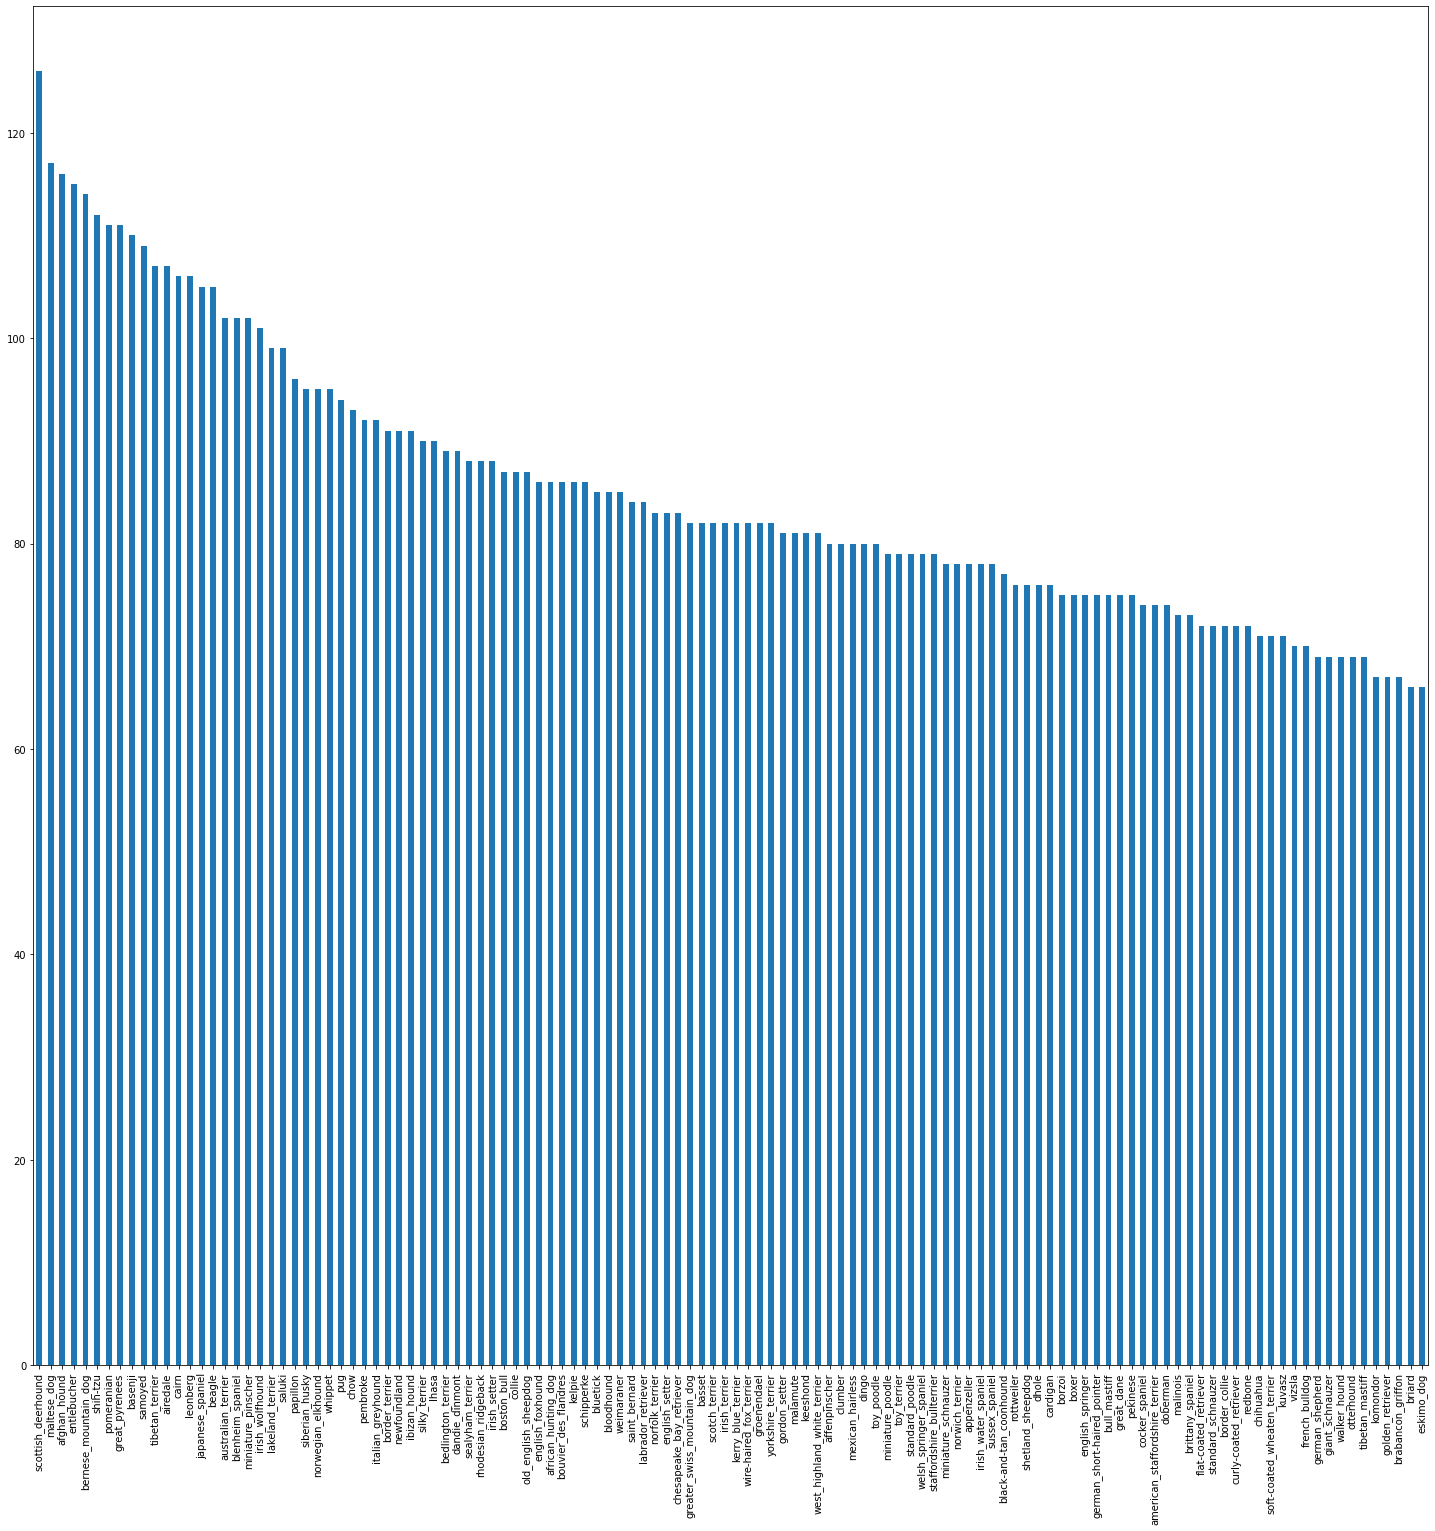

In [14]:
lable_csv["breed"].value_counts().plot.bar(figsize=(25,25));

In [15]:
lable_csv["breed"].value_counts().median()

82.0

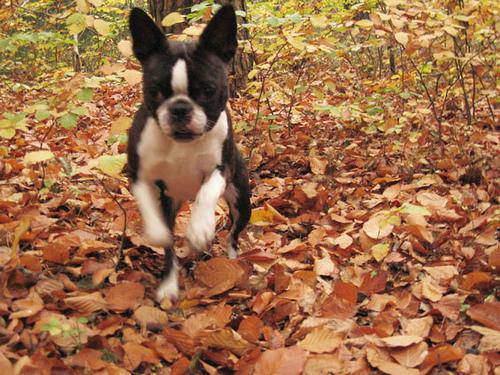

In [16]:
from IPython.display import Image
Image("drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [17]:
file_path=["drive/My Drive/Dogvision/train/"+fname+".jpg" for fname in lable_csv["id"]]

In [18]:
file_path[:10]

['drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [19]:
labels=lable_csv["breed"].to_numpy()

In [20]:
unique_breeds=n.unique(labels)

In [21]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [22]:
if len(labels) == len(file_path):
  print("Number Labels matches Number of File_path")
else:
  print("Not Matching")

Number Labels matches Number of File_path


In [23]:
x=file_path

In [24]:
y=labels

In [25]:
x

['drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dogvision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dogvision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dogvision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dogvision/train/006cc3ddb9dc1bd827479569fcdc52d

In [26]:
len(y)

10222

In [27]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dogvision/train/")) == len(file_path):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [28]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [29]:
# Setup X & y variables
X = file_path
y = boolean_labels

In [30]:
len(labels)

10222

In [31]:
print(labels[0])
print(n.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [32]:
labels[0]

'boston_bull'

In [33]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


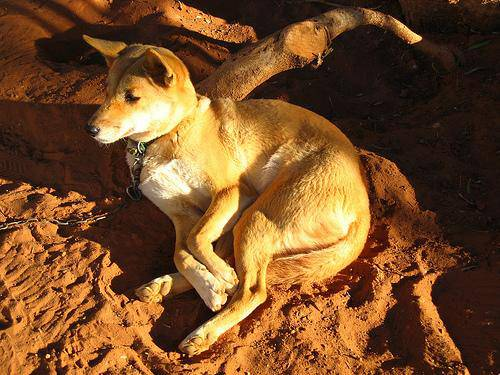

In [34]:
Image("drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [39]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1}

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [120]:
len(x_train),len(x_val),len(y_train),len(y_val)

(1203, 301, 1203, 301)

In [121]:
x_train[:10]

['drive/My Drive/Dogvision/train/13cab1309bdaf21aa17cf71fd6f88a65.jpg',
 'drive/My Drive/Dogvision/train/21362f7f3d079a6cbc8b72432fd8b11d.jpg',
 'drive/My Drive/Dogvision/train/1eb28a82080de0447017caf4d03d3934.jpg',
 'drive/My Drive/Dogvision/train/1bd8bbf78f1e60ace3f5d18090ac022c.jpg',
 'drive/My Drive/Dogvision/train/1b801c3bdbb2c85e30cbefb641878005.jpg',
 'drive/My Drive/Dogvision/train/0825e8471e3c9a14dc341bdd8630f05e.jpg',
 'drive/My Drive/Dogvision/train/24e5ea89ab96f5534ca2be217ef17643.jpg',
 'drive/My Drive/Dogvision/train/1986d8c21c77b80cd81c2b2e1fe24665.jpg',
 'drive/My Drive/Dogvision/train/193a03557eb1c0fed9b2ef8f9f9d892f.jpg',
 'drive/My Drive/Dogvision/train/0d8d386390ba269dd4e475c20b91e8f9.jpg']

In [122]:
y_val[:2][:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

 ## PreProcessing The Images into tensors
 Turning the Images into Tensors using Function


In [123]:
from matplotlib.pyplot import imread
image=imread(file_path[42])

In [124]:
image.shape

(257, 350, 3)

In [125]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1.Take an image filepath as input

2.Use TensorFlow to read the file and save it to a variable image

3.Turn our image (a jpg) into Tensors

4.Normalize our image (convert color channel values         from    (0-255 to 0-1).
5.Resize the image to be a shape of (224, 224)

6.Return the modified image
More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [126]:
image.min(),image.max()

(0, 255)

In [127]:
Img_size=224
def process_images(file,img_size=Img_size):
  "Read file as an Image"
  image=tf.io.read_file(file)
  "Turn Numerical Tensors into Channels colors with 3 red, green,blue"
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[Img_size,Img_size])
  return image

In [ ]:
#ten=tf.io.read_file(file_path[3])

In [ ]:
#ten

In [ ]:
#ten=tf.image.decode_jpeg(ten,channels=3)

In [ ]:
#ten

In [ ]:
# ten=tf.image.convert_image_dtype(ten,tf.float32)

In [ ]:
#ten

In [128]:
p=process_images(file_path[2])

In [129]:
print(p)

tf.Tensor(
[[[0.3918853  0.3918853  0.36051273]
  [0.43775532 0.43775532 0.40638277]
  [0.44351017 0.44351017 0.41213763]
  ...
  [0.05796662 0.02239764 0.01937653]
  [0.05252095 0.0470589  0.04978992]
  [0.04586835 0.05371149 0.04978992]]

 [[0.38653433 0.38261276 0.3630049 ]
  [0.4161569  0.41223532 0.39262748]
  [0.43315482 0.42923325 0.4096254 ]
  ...
  [0.0909924  0.05177672 0.04754004]
  [0.03035708 0.02489503 0.02762605]
  [0.02370449 0.03154762 0.02762605]]

 [[0.36859885 0.36467728 0.34506944]
  [0.35422263 0.35030106 0.33069322]
  [0.39899355 0.39507198 0.3754641 ]
  ...
  [0.2361781  0.20233706 0.19541305]
  [0.04896353 0.04268564 0.04582458]
  [0.04459034 0.04705883 0.04582458]]

 ...

 [[0.7591447  0.75522316 0.7356153 ]
  [0.74550796 0.7415864  0.72197855]
  [0.7532336  0.74931204 0.72970414]
  ...
  [0.44312337 0.4392018  0.41959396]
  [0.4550094  0.45067993 0.4440605 ]
  [0.41266778 0.406059   0.4062775 ]]

 [[0.75528663 0.75136507 0.73175716]
  [0.7678576  0.76393604 0

In [130]:
def get_image_label(file,lable):
  image=process_images(file)
  return image,lable


In [131]:
(process_images(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [133]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [134]:
train_data=create_data_batches(x_train,y_train)
valid_data=create_data_batches(x_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [135]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizes the Data

In [136]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(20,20))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
   
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [137]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [138]:
train_images,train_lables=next(train_data.as_numpy_iterator())

In [139]:
len(train_images),len(train_lables)

(32, 32)

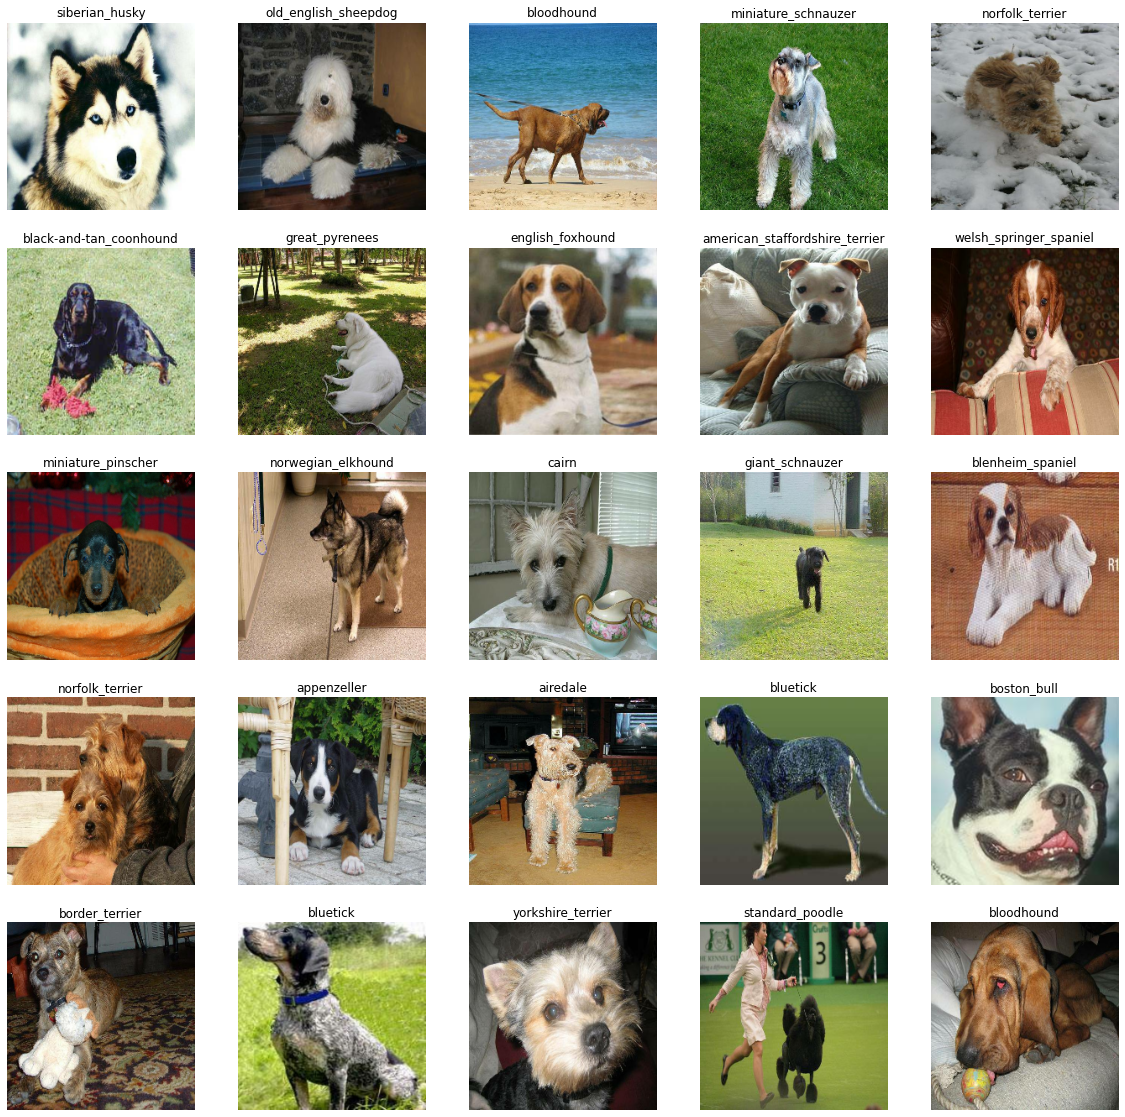

In [140]:
train_images,train_lables=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_lables)

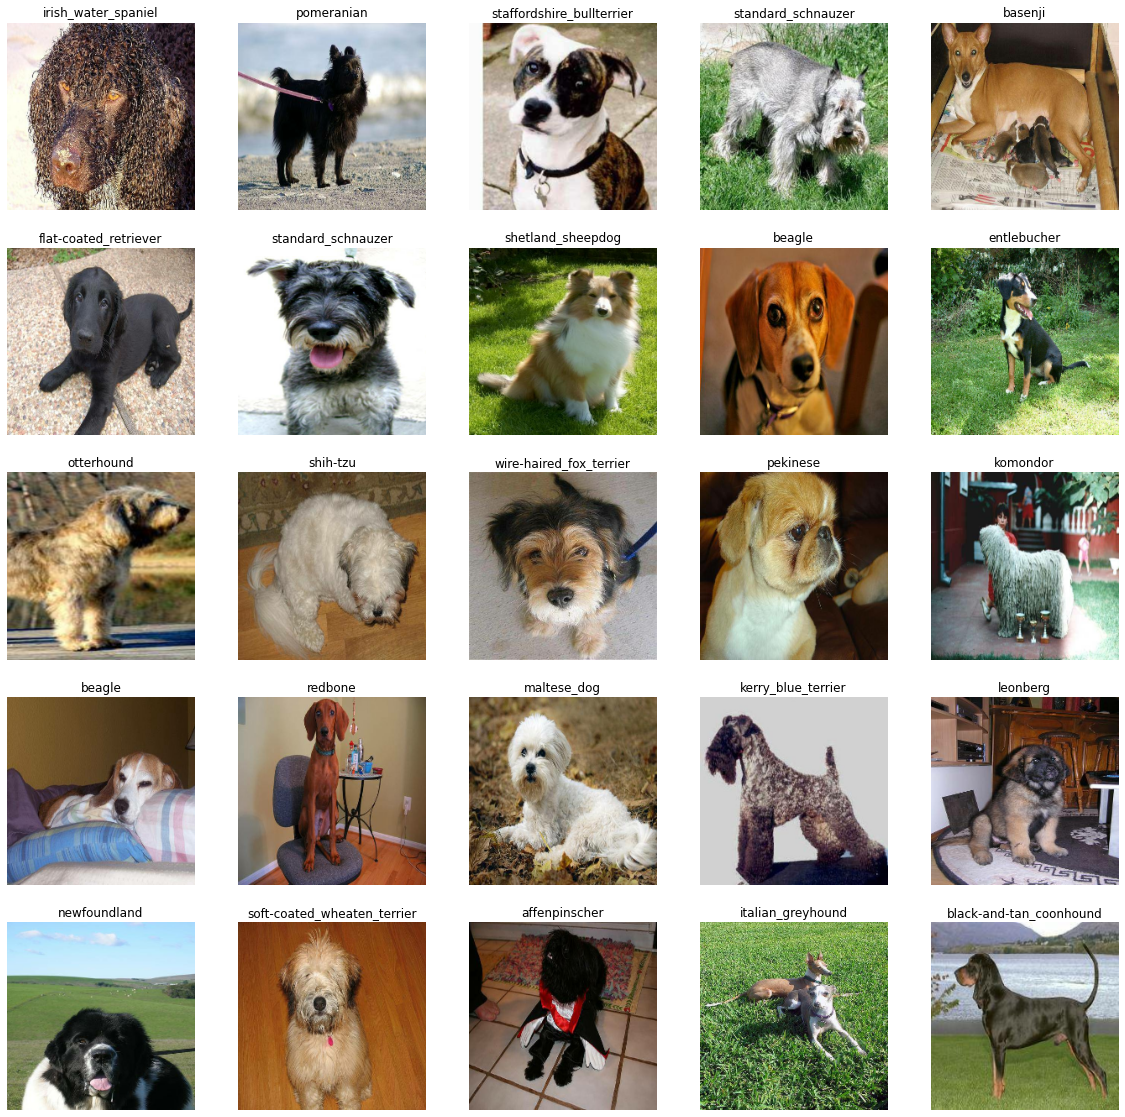

In [141]:
valid_images,valid_labele=next(valid_data.as_numpy_iterator())
show_25_images(valid_images,valid_labele)

In [142]:
Input_shape=[None,Img_size,Img_size,3]
Output_shape=len(unique_breeds)
model_url="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

# Model Creation 

Softmax:

In mathematics, the softmax function, also known as softargmax[1]:184 or normalized exponential function,[2]:198 is a function that takes as input a vector z of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval {\displaystyle (0,1)}(0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.



In [144]:
def Model_creation(Input_shape=Input_shape,Output_shape=Output_shape,model_url=model_url):
  print("Building the model",model_url)
  #setip model layers
  model=tf.keras.Sequential([hub.KerasLayer(model_url),
                           tf.keras.layers.Dense(units=Output_shape,activation="softmax")
                           ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
      )
  model.build(Input_shape)
  return model

In [145]:
model=Model_creation()
model.summary()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_4 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [146]:
output_s=n.ones(shape=(1,1,1280))

In [147]:
output_s

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating the  callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

Load the TensorBoard notebook extension ✅
Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard


In [148]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [149]:
import datetime
def create_tensorboard_callbacks():
  #create Log directory for store the logs
  logdir=os.path.join("drive/My Drive/Dogvision/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback:
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [150]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [151]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Training the model
For First 1000 set of data


In [152]:
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


Let's create a function which trains a model.

Create a model using create_model()
Setup a TensorBoard callback using create_tensorboard_callback()
Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
Return the model

In [153]:

def train_model():
  model=Model_creation()
  TensorBoard=create_tensorboard_callbacks()
  model.fit(x=train_data,epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[TensorBoard,early_stopping])
  return model

In [154]:
model=train_model()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 2/38 [>.............................] - ETA: 15s - loss: 5.7475 - accuracy: 0.0000e+00WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1697s vs `on_train_batch_end` time: 0.6508s). Check your callbacks.


38/38 [==============================] - 9s 241ms/step - loss: 4.0647 - accuracy: 0.1696 - val_loss: 2.4422 - val_accuracy: 0.4817
Epoch 2/100
38/38 [==============================] - 8s 216ms/step - loss: 1.1034 - accuracy: 0.7797 - val_loss: 1.3758 - val_accuracy: 0.6811
Epoch 3/100
38/38 [==============================] - 8s 216ms/step - loss: 0.3894 - accuracy: 0.9510 - val_loss: 1.1196 - val_accuracy: 0.7209
Epoch 4/100
38/38 [==============================] - 8s 209ms/step - loss: 0.2006 - accuracy: 0.9875 - val_loss: 1.0451 - val_accuracy: 0.7143
Epoch 5/100
38/38 [==============================] - 8s 211ms/step - loss: 0.1262 - accuracy: 0.9975 - val_loss: 0.9892 - val_accuracy: 0.7409
Epoch 6/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0874 - accuracy: 1.0000 - val_loss: 0.9668 - val_accuracy: 0.7309
Epoch 7/100
38/38 [==============================] - 8s 211ms/step - loss: 0.0663 - accuracy: 1.0000 - val_loss: 0.9438 - val_accuracy: 0.7342
Epoch 8/100

In [172]:
#Checking the Tensorboard Log function
%tensorboard --logdir "drive/My Drive/Dogvision/logs"

Reusing TensorBoard on port 6006 (pid 2700), started 0:09:45 ago. (Use '!kill 2700' to kill it.)

<IPython.core.display.Javascript object>

# Make Prediction and VEvaluate the model using the training the model

In [156]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [157]:
Predictions=model.predict(valid_data,verbose=1)
Predictions

 2/10 [=====>........................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0699s vs `on_predict_batch_end` time: 0.1085s). Check your callbacks.


10/10 [==============================] - 2s 153ms/step


array([[2.00464128e-04, 1.94532520e-04, 1.32327141e-05, ...,
        2.77007566e-05, 7.85759839e-05, 3.14458339e-06],
       [6.81963190e-02, 8.00429611e-04, 1.09623092e-04, ...,
        3.96122923e-04, 6.66997294e-05, 6.85666967e-03],
       [3.02131777e-03, 6.63203755e-05, 2.03437798e-04, ...,
        1.27919257e-01, 7.91030994e-04, 5.70551550e-04],
       ...,
       [1.64533951e-04, 7.04895530e-04, 4.84740973e-04, ...,
        2.27772747e-04, 1.00025856e-04, 9.22717736e-05],
       [6.17862970e-04, 1.16692446e-02, 6.92109970e-05, ...,
        2.36049222e-04, 4.87201056e-03, 2.60653370e-03],
       [5.27835073e-06, 4.30156979e-06, 1.30272547e-05, ...,
        9.17537417e-03, 3.18471488e-04, 3.90131709e-06]], dtype=float32)

In [158]:
Predictions.shape

(301, 120)

In [159]:
len(
    Predictions
)

301

In [160]:
n.sum(Predictions[0])

0.99999994

In [161]:
# First prediction
index = 42
print(Predictions[index])
print(f"Max value (probability of prediction): {n.max(Predictions[index])}")
print(f"Sum: {n.sum(Predictions[index])}")
print(f"Max index: {n.argmax(Predictions[index])}")
print(f"Predicted label: {unique_breeds[n.argmax(Predictions[index])]}")

[4.5256577e-03 1.6752994e-04 3.4096313e-04 1.2657510e-03 2.3613040e-05
 6.8142050e-05 3.2453197e-01 1.6734081e-04 3.9022350e-05 1.4878731e-05
 1.7001219e-05 2.1733105e-04 1.7909799e-03 4.1062635e-04 6.8194902e-05
 4.6187139e-04 1.4060765e-05 2.8136745e-04 1.3810671e-06 2.2370112e-04
 2.4617944e-04 1.1262681e-04 1.7483011e-03 4.6722128e-04 2.8028133e-05
 6.7288980e-05 1.6502821e-03 6.4535875e-06 1.6978891e-05 1.2525550e-02
 1.1593115e-05 7.8318299e-05 4.2855486e-04 3.8735502e-06 2.8684946e-05
 3.8208207e-04 5.6239471e-05 1.9334505e-04 2.7512386e-04 8.5218271e-05
 2.4726189e-04 1.1548799e-05 8.2098049e-06 4.0611922e-06 2.4787541e-05
 7.3328971e-05 7.2279159e-04 3.0675914e-05 9.9509278e-05 2.4591101e-04
 1.1565741e-03 1.8360834e-05 2.1811131e-06 1.1504203e-05 7.4988217e-05
 2.0422078e-04 6.6320383e-04 1.7233003e-02 1.8582121e-04 3.8379651e-05
 3.6126934e-05 5.4086026e-06 3.8987386e-05 2.4818835e-05 1.4354009e-04
 2.6443572e-06 3.5826019e-06 2.2154354e-06 5.7957349e-03 1.8584957e-05
 1.233

In [177]:
def give_lable(Prediction_propabilities):
  return unique_breeds[n.argmax(Prediction_propabilities)]
lab=give_lable(Predictions[1])
# Turn prediction probabilities into their respective label (easier to understand)


In [163]:
lab

'groenendael'

In [164]:
img=[]
labl=[]
for i,l in valid_data.unbatch().as_numpy_iterator():
  img.append(i)
  labl.append(l)
 

In [165]:
img[0]

array([[[0.97364324, 0.9187413 , 0.9187413 ],
        [0.9784752 , 0.92357326, 0.92357326],
        [0.9748337 , 0.91993177, 0.91993177],
        ...,
        [0.21722774, 0.16624735, 0.20154147],
        [0.22580205, 0.19749998, 0.2631454 ],
        [0.16543259, 0.14388935, 0.22161256]],

       [[0.9631128 , 0.9082108 , 0.9082108 ],
        [0.9685771 , 0.9136751 , 0.9136751 ],
        [0.96827215, 0.9133702 , 0.9133702 ],
        ...,
        [0.23927341, 0.18829302, 0.22358714],
        [0.1888466 , 0.15793137, 0.21731307],
        [0.23083757, 0.19843361, 0.26834556]],

       [[0.95266986, 0.8977679 , 0.8977679 ],
        [0.9614234 , 0.90652144, 0.90652144],
        [0.96470594, 0.909804  , 0.909804  ],
        ...,
        [0.1688754 , 0.11789501, 0.15318912],
        [0.19458547, 0.14876089, 0.19947876],
        [0.3124491 , 0.2666245 , 0.32399496]],

       ...,

       [[0.9921569 , 0.9843138 , 0.9333334 ],
        [0.9909226 , 0.9864058 , 0.91760325],
        [0.9896882 , 0

In [166]:
s=give_lable(labl[0])


In [167]:
s

'irish_water_spaniel'

In [182]:
def unbatchify(data):
  img=[]
  labl=[]
  for i,l in valid_data.unbatch().as_numpy_iterator():
    img.append(i)
    labl.append(unique_breeds[n.argmax(l)])
  return img,labl
 


In [184]:
def plot_preds(Prediction_prob,labels,images,n=1):
  Pred_prob,true_label,image=Prediction_prob[n],labels[n],images[n]
  pred_label=give_lable(Pred_prob)
  if pred_label == true_label:
    color="green"
  else:
    color="red"
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title("{} {:2.0f}%".format(pred_label,(max(Pred_prob))*100),color=color)


In [183]:
valid_img,valid_lab=unbatchify(valid_data)

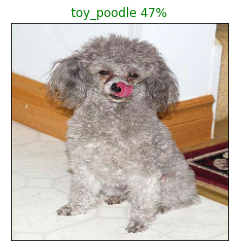

In [190]:
plot_preds(Prediction_prob=Predictions,labels=valid_lab,images=valid_img,n=91)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

Take an input of prediction probabilities array and a ground truth array and an integer ✅
Find the prediction using get_pred_label() ✅
Find the top 10:
Prediction probabilities indexes ✅
Prediction probabilities values ✅
Prediction labels ✅
Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [174]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]